In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from portfolio_optimizer.weight_allocators.HierarchicalRiskParity import HierarchicalRiskParity
from scipy.cluster.hierarchy import dendrogram
from data.numerical_example import generate_data

In [20]:
nObs, size0, size1, sigma1 = 10000, 5, 5, 0.25
x, cols = generate_data(nObs, size0, size1, sigma1)

In [21]:
hrp = HierarchicalRiskParity()
final_result = hrp.fit(x)

In [22]:
for key, value in final_result.items():
    print(f"{key} & {value * 100:.2f}\% & {x[key].std():.3f}\\\\")
    print("\hline")

1 & 6.93\% & 1.000\\
\hline
2 & 7.59\% & 1.005\\
\hline
3 & 10.85\% & 1.000\\
\hline
4 & 19.01\% & 1.006\\
\hline
5 & 9.71\% & 1.003\\
\hline
6 & 10.29\% & 1.027\\
\hline
7 & 6.53\% & 1.031\\
\hline
8 & 9.19\% & 1.031\\
\hline
9 & 12.80\% & 1.033\\
\hline
10 & 7.12\% & 1.038\\
\hline


In [23]:
hrp_dev = 0
n_dev = 0

for i, elem_i in enumerate(final_result.items()):
    for j, elem_j in enumerate(final_result.items()):
        if j < i:
            continue
        elif j == i:
            hrp_dev += elem_i[1]**2 * x[elem_i[0]].std()**2
            n_dev += (0.1)**2 * x[elem_i[0]].std()**2
        else:
            hrp_dev += 2 * elem_i[1]* x[elem_i[0]].std() * elem_j[1] * x[elem_j[0]].std() * x.corr().loc[elem_i[0], elem_j[0]]
            n_dev += 2 * 0.1* x[elem_i[0]].std() * 0.1 * x[elem_j[0]].std() * x.corr().loc[elem_i[0], elem_j[0]]


hrp_dev = np.sqrt(hrp_dev)
n_dev = np.sqrt(n_dev)
print(f"{hrp_dev:.4f}")
print(f"{n_dev:.4f}")

0.4637
0.4738


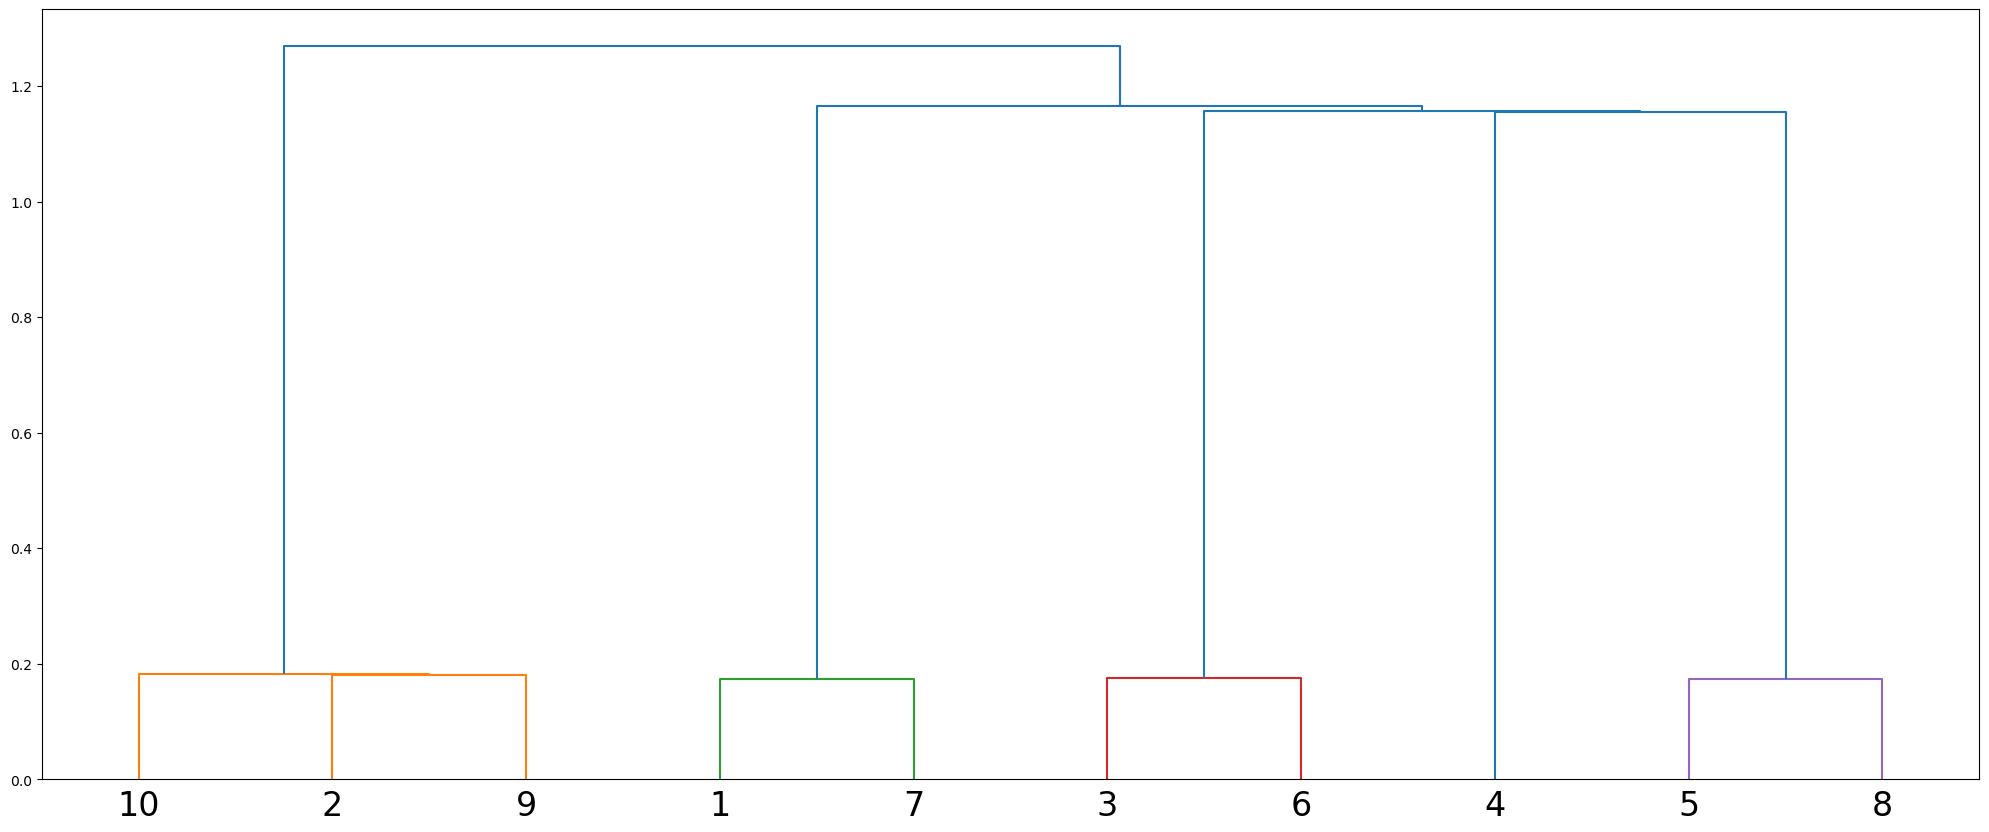

In [24]:
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(hrp.linkage_matrix, labels=x.columns, leaf_font_size=24)
plt.show()

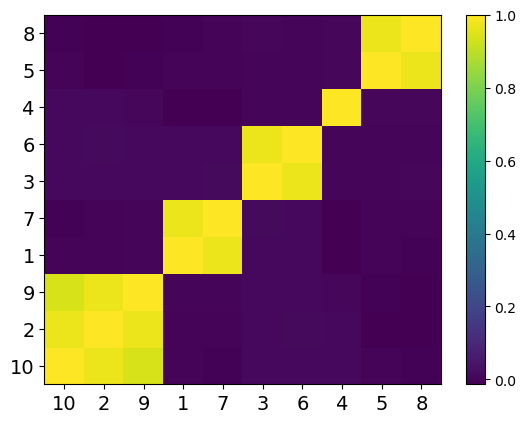

In [31]:
plt.pcolor(hrp.corr_matrix[:, hrp.sorted_elems][hrp.sorted_elems, :])
plt.colorbar()
plt.yticks(np.arange(.5,hrp.corr_matrix.shape[0]+.5),x.columns[hrp.sorted_elems], fontsize=14)
plt.xticks(np.arange(.5,hrp.corr_matrix.shape[0]+.5),x.columns[hrp.sorted_elems], fontsize=14)
plt.show()

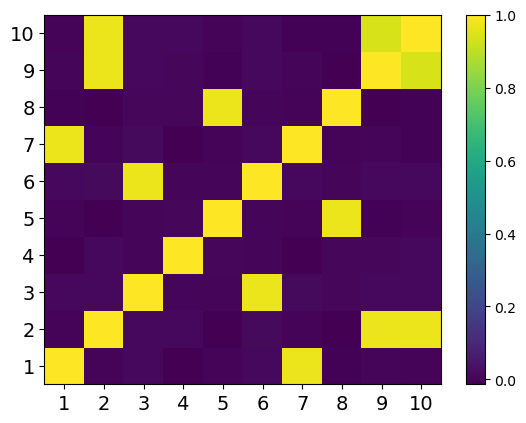

In [32]:
plt.pcolor(hrp.corr_matrix)
plt.colorbar()
plt.yticks(np.arange(.5,hrp.corr_matrix.shape[0]+.5),x.columns,fontsize=14)
plt.xticks(np.arange(.5,hrp.corr_matrix.shape[0]+.5),x.columns, fontsize=14)
plt.show()

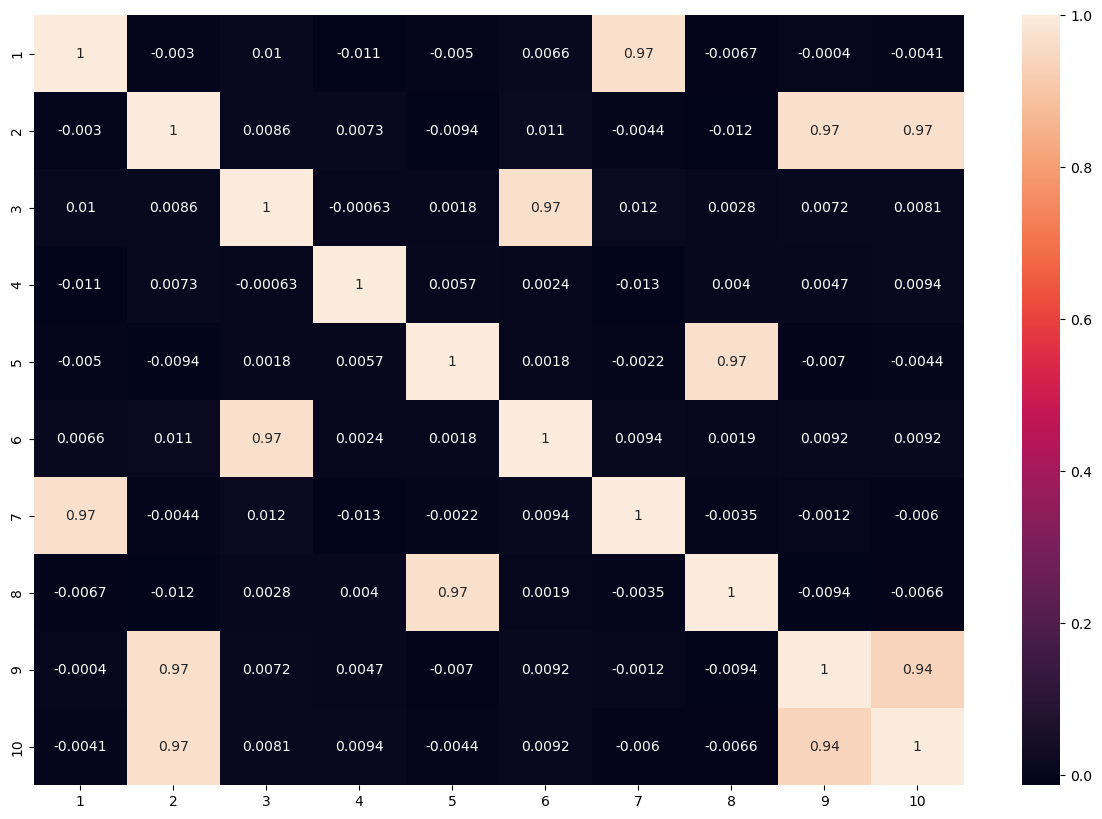

In [27]:
fig = plt.figure(figsize=(15, 10))
sns.heatmap(hrp.corr_matrix, annot=True)
plt.yticks(np.arange(.5,hrp.corr_matrix.shape[0]+.5), x.columns)
plt.xticks(np.arange(.5,hrp.corr_matrix.shape[0]+.5), x.columns)
plt.show()

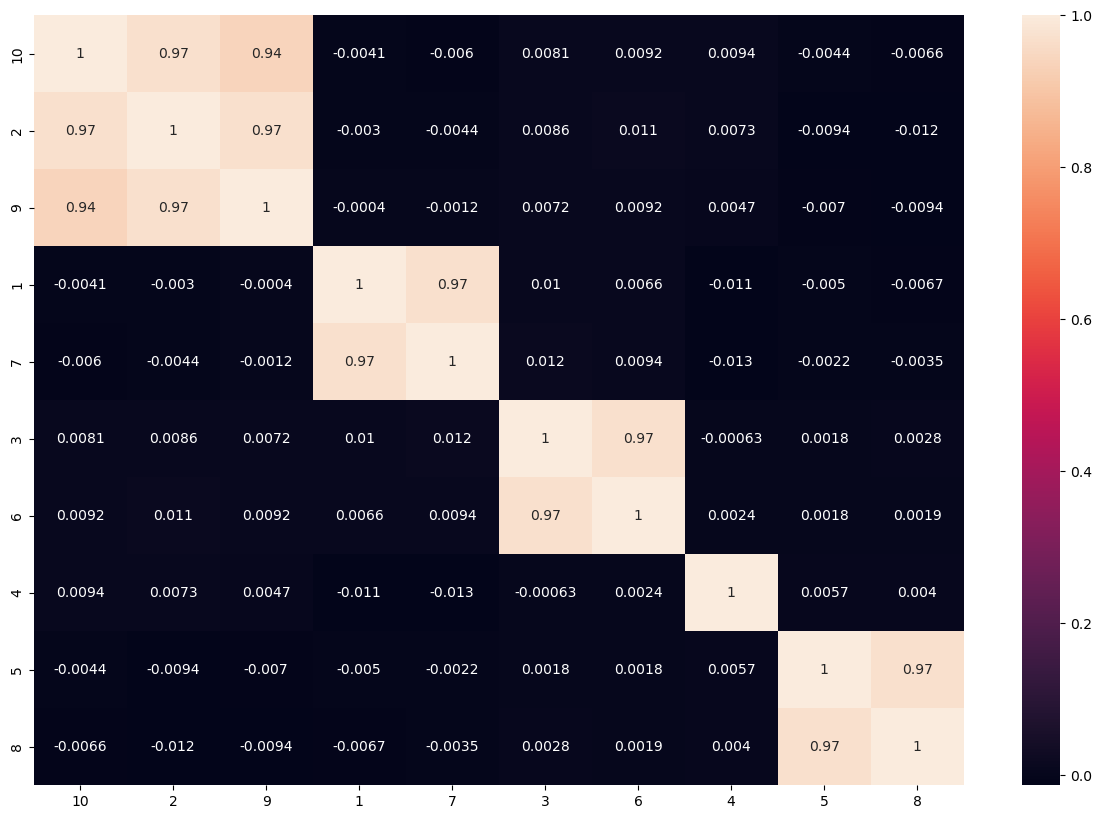

In [28]:
fig = plt.figure(figsize=(15, 10))
sns.heatmap(hrp.corr_matrix[:, hrp.sorted_elems][hrp.sorted_elems, :], annot=True)
plt.yticks(np.arange(.5,hrp.corr_matrix.shape[0]+.5),x.columns[hrp.sorted_elems])
plt.xticks(np.arange(.5,hrp.corr_matrix.shape[0]+.5),x.columns[hrp.sorted_elems])
plt.show()

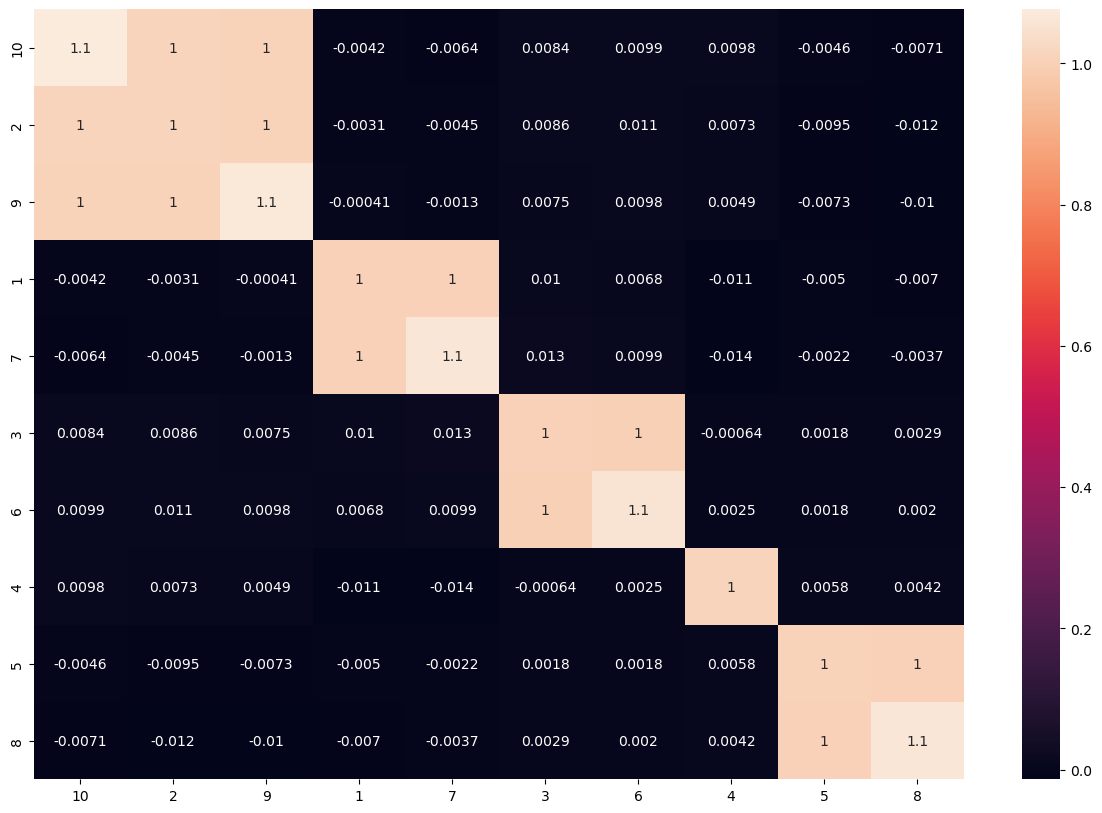

In [29]:
fig = plt.figure(figsize=(15, 10))
sns.heatmap(hrp.cov_matrix[:, hrp.sorted_elems][hrp.sorted_elems, :], annot=True)
plt.yticks(np.arange(.5,hrp.corr_matrix.shape[0]+.5),x.columns[hrp.sorted_elems])
plt.xticks(np.arange(.5,hrp.corr_matrix.shape[0]+.5),x.columns[hrp.sorted_elems])
plt.show()